In [35]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def icon_color(icon):
    if icon == 'b':
        return 'gainsboro'
    if icon == 'W':
        return 'whitesmoke'
    if icon == 'O':
        return 'orange'
    if icon == 'B':
        return 'dodgerblue'
    if icon == 'G':
        return 'yellowgreen'    
    if icon == 'K':
        return 'dimgray'

In [31]:
# Preferred Sorting
all_icons = [
'O','B','W','G','K',
'OO',
'BB','OB',
'OG','BG','WG',
'OK','KB','WK','KG','KK',    
'OKG','WOB','KKK','OKB', 'KKG',
'b'
]

In [62]:
	O = 10
	B = 12
	W = 8
	G = 0
	K = 3

	OO = 0
	BB = 0
	OB = 0
	
	OG = 5
	BG = 0
	WG = 0

	OK = 0
	KB = 0
	WK = 2
	KG = 0
	KK = 0

	OKG = 0
	WOB = 0
	KKK = 0
	OKB = 0
	KKG = 0
	b   = 0

In [63]:
composition = {
# single icon
	'O':O,'B':B,'W':W,'G':G,'K':K,   
# 2 icons
	'OO':OO,
	'BB':BB,'OB':OB,             
	'OG':OG,'BG':BG,'WG':WG,    
	'OK':OK,'KB':KB,'WK':WK,'KG':KG,'KK':KK,   
# 3 icons  
	'OKG':OKG,
    'WOB':WOB,
	'KKK':KKK,
	'OKB':OKB,
	'KKG':KKG,
#no icons
	'b':b
	}

In [64]:
composition.keys()

dict_keys(['O', 'B', 'W', 'G', 'K', 'OO', 'BB', 'OB', 'OG', 'BG', 'WG', 'OK', 'KB', 'WK', 'KG', 'KK', 'OKG', 'WOB', 'KKK', 'OKB', 'KKG', 'b'])

In [65]:
N = sum(composition.values())
N

40

In [66]:
icons = []
for i in range(len(all_icons)):
	if composition[all_icons[i]] > 0:
		icons.append(all_icons[i])  

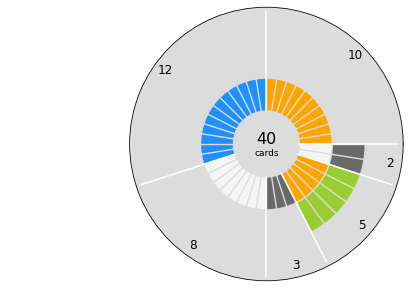

In [67]:
# CHART DEFINITION:

fig, ax = plt.subplots()

#fig.patch.set_visible(False)
ax.axis('off')

ax = plt.axes( [0.25,0.025,0.95,0.95],polar=True)

ax.set_facecolor('gainsboro')

size = sum(composition.values())

# Inner Ring (1st icon, if any)

width = []
theta = []
radii = []
bars = []

for i in range(len(icons)):
	if composition[icons[i]] >= 0:
		wdt = 2*np.pi*composition[icons[i]]/size
		width.append(wdt)
		center = 2*np.pi*sum([composition[icons[j]] for j in range(i)])/size
		shift = wdt/2
		theta.append(center+shift)
		radii.append(1)
		plt.plot([center,center],[1,4],c='white')
		plt.text(center+shift, 3.8, str(composition[icons[i]]),horizontalalignment='center',verticalalignment='center',fontsize=12, color='black')
 
bars1 = plt.bar(theta, radii, width=width, bottom=1)

for i in range(len(icons)):
	bars1[i].set_facecolor(icon_color(icons[i][0]))

    # Middle Ring (2st icon, if any)
    
width = []
theta = []
radii = []
bars = []

for i in range(len(icons)):
	if len(icons[i]) >= 2 and composition[icons[i]] > 0:
		wdt = 2*np.pi*composition[icons[i]]/size
		width.append(wdt)
		shift = wdt / 2
		center = 2*np.pi*sum([composition[icons[j]] for j in range(i)])/size
		theta.append(center+shift)
		radii.append(1)
        
bars2 = plt.bar(theta, radii, width=width, bottom=2)

icons2 = []
for i in range(len(icons)):
	if len(icons[i]) >= 2 and composition[icons[i]] > 0:
		icons2.append(icons[i])

for i in range(len(icons2)):
	bars2[i].set_facecolor(icon_color(icons2[i][1]))

    # Outher Ring (3rd icon, if any)
    
width = []
theta = []
radii = []
bars = []

for i in range(len(icons)):
	if len(icons[i]) == 3 and composition[icons[i]] > 0:
		wdt = 2*np.pi*composition[icons[i]]/size
		width.append(wdt)
		shift = wdt / 2
		center = 2*np.pi*sum(
			[composition[icons[j]] for j in range(i)])/size
		shift = wdt/2
		theta.append(center+shift)
		radii.append(1)
        
bars3 = plt.bar(theta, radii, width=width, bottom=3)

icons3 = []

for i in range(len(icons)):
	if len(icons[i]) == 3 and composition[icons[i]] > 0:
		icons3.append(icons[i])

for i in range(len(icons3)):
	bars3[i].set_facecolor(icon_color(icons3[i][2]))

lines, labels = plt.thetagrids([(360./size)*i for i in range(size)], [])
lines, labels = plt.rgrids([1,2,3,4], [])
ax.grid(linewidth=1.4,c='gainsboro')

ax.text(0.5, 0.515, str(size),horizontalalignment='center',verticalalignment='center',fontsize=16, color='black',transform=ax.transAxes )

ax.text(0.5, 0.465, 'cards',horizontalalignment='center',verticalalignment='center',fontsize=9, color='black',transform=ax.transAxes );